In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Loading Data

In [7]:
df1 = pd.read_excel(r'Project3_GenerationDispatch.xlsx','powerPrice',index_col=0)
df1

,HE1,HE2,HE3,HE4,HE5,HE6,HE7,HE8,HE9,HE10,HE11,HE12,HE13,HE14,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
Date,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,38.000000,39.355392,34.626365,31.054015,31.344355,33.465550,38.310642,51.612304,59.319929,67.827485,81.617123,84.766491,89.326155,102.718257,112.077724,124.554282,121.827613,98.418717,83.869277,74.786659,73.448845,66.548534,47.396075,38.831912
2011-06-02,33.593616,33.606122,32.354528,31.274359,32.026587,33.142159,36.310319,40.296283,42.311022,46.674041,51.743669,53.713840,55.569879,61.261930,64.443927,67.976378,67.752257,60.743482,53.301269,49.452922,50.326186,45.565143,36.729084,32.727587
2011-06-03,32.293507,30.634917,27.565842,26.813051,27.460818,30.501847,33.817086,37.645471,39.036606,40.235478,45.292536,49.526780,55.125494,57.908511,60.720871,65.680930,68.232932,63.434124,52.710281,45.995139,45.198169,42.829977,39.620136,36.192705
2011-06-04,32.744399,31.973549,31.059064,29.548871,28.779442,28.882158,29.160860,32.504133,35.158368,37.748415,41.601883,45.362320,49.257071,49.193096,53.444718,60.304318,66.700160,58.616541,49.174129,45.570686,45.360873,45.856755,37.659000,35.700419
2011-06-05,32.462243,30.316600,28.457491,27.457401,27.068929,26.974801,26.951645,28.106413,32.179481,34.344162,35.893242,40.988392,45.465087,46.253506,46.689036,46.604262,47.958736,47.046500,44.374389,44.066582,43.877104,44.135593,33.913758,31.615728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-26,21.806442,20.451327,18.573344,17.158109,17.128918,19.455119,21.505219,22.179190,23.736748,25.829853,27.939934,29.825351,30.543040,28.471708,28.744310,28.080878,27.960293,27.824867,27.284950,32.438847,31.338603,25.137243,23.166140,20.500089
2015-09-27,19.667340,18.322255,17.259341,12.605488,12.371392,16.854907,18.710416,19.077549,22.649406,24.369337,24.592867,25.136424,25.729840,26.221938,27.050221,27.510889,28.298770,29.315448,29.353348,38.722739,32.888952,26.726489,23.865234,22.480865
2015-09-28,20.333870,19.399722,17.045062,16.165473,18.389624,22.101171,30.967083,26.224321,27.658023,30.360403,30.532868,32.982014,35.380510,36.832215,39.828119,40.141329,41.431930,36.115586,33.663774,48.144683,39.747604,30.809900,25.624963,23.444321


In [8]:
df2 = pd.read_excel(r'Project3_GenerationDispatch.xlsx','gasPrice',index_col=0)
df2

,gasprice
Date,
2011-06-01,4.825
2011-06-02,4.825
2011-06-03,4.870
2011-06-04,4.940
2011-06-05,4.940
...,...
2015-09-26,2.865
2015-09-27,2.865
2015-09-28,2.865


In [9]:
df= pd.DataFrame().reindex_like(df1)
df

,HE1,HE2,HE3,HE4,HE5,HE6,HE7,HE8,HE9,HE10,HE11,HE12,HE13,HE14,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
Date,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calulate Hourly Headroom

In [10]:
heatrate=10.5
vomcost=5
gasadder=0.3
for i in df1.index:
    gasprice=df2.loc[i][0]
    for j in range(0,24):
        powerprice=df1.loc[i][j]
        headroom=powerprice-(gasprice+gasadder)*heatrate-vomcost
        df.loc[i][j]=headroom
        
df

,HE1,HE2,HE3,HE4,HE5,HE6,HE7,HE8,HE9,HE10,HE11,HE12,HE13,HE14,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
Date,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,-20.812500,-19.457108,-24.186135,-27.758485,-27.468145,-25.346950,-20.501858,-7.200196,0.507429,9.014985,22.804623,25.953991,30.513655,43.905757,53.265224,65.741782,63.015113,39.606217,25.056777,15.974159,14.636345,7.736034,-11.416425,-19.980588
2011-06-02,-25.218884,-25.206378,-26.457972,-27.538141,-26.785913,-25.670341,-22.502181,-18.516217,-16.501478,-12.138459,-7.068831,-5.098660,-3.242621,2.449430,5.631427,9.163878,8.939757,1.930982,-5.511231,-9.359578,-8.486314,-13.247357,-22.083416,-26.084913
2011-06-03,-26.991493,-28.650083,-31.719158,-32.471949,-31.824182,-28.783153,-25.467914,-21.639529,-20.248394,-19.049522,-13.992464,-9.758220,-4.159506,-1.376489,1.435871,6.395930,8.947932,4.149124,-6.574719,-13.289861,-14.086831,-16.455023,-19.664864,-23.092295
2011-06-04,-27.275601,-28.046451,-28.960936,-30.471129,-31.240558,-31.137842,-30.859140,-27.515867,-24.861632,-22.271585,-18.418117,-14.657680,-10.762929,-10.826904,-6.575282,0.284318,6.680160,-1.403459,-10.845871,-14.449314,-14.659127,-14.163245,-22.361000,-24.319581
2011-06-05,-27.557757,-29.703400,-31.562509,-32.562599,-32.951071,-33.045199,-33.068355,-31.913587,-27.840519,-25.675838,-24.126758,-19.031608,-14.554913,-13.766494,-13.330964,-13.415738,-12.061264,-12.973500,-15.645611,-15.953418,-16.142896,-15.884407,-26.106242,-28.404272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-26,-16.426058,-17.781173,-19.659156,-21.074391,-21.103582,-18.777381,-16.727281,-16.053310,-14.495752,-12.402647,-10.292566,-8.407149,-7.689460,-9.760792,-9.488190,-10.151622,-10.272207,-10.407633,-10.947550,-5.793653,-6.893897,-13.095257,-15.066360,-17.732411
2015-09-27,-18.565160,-19.910245,-20.973159,-25.627012,-25.861108,-21.377593,-19.522084,-19.154951,-15.583094,-13.863163,-13.639633,-13.096076,-12.502660,-12.010562,-11.182279,-10.721611,-9.933730,-8.917052,-8.879152,0.490239,-5.343548,-11.506011,-14.367266,-15.751635
2015-09-28,-17.898630,-18.832778,-21.187438,-22.067027,-19.842876,-16.131329,-7.265417,-12.008179,-10.574477,-7.872097,-7.699632,-5.250486,-2.851990,-1.400285,1.595619,1.908829,3.199430,-2.116914,-4.568726,9.912183,1.515104,-7.422600,-12.607537,-14.788179


# ***Version 1***

## First of all, we are not considering turn on/off by hour, instead by day

In [11]:
#daily revenue
drev=[]
for i in df.index:
    rev=sum(df.loc[i])*200-10000
    drev.append(rev)

-107469032.13389996

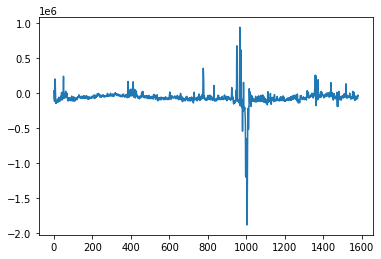

In [12]:
plt.plot(drev)
sum(drev)

In [13]:
df['Bydayrev']=drev
df['Bydayrev']=df['Bydayrev']+10000

In [14]:
#df.to_excel('Project3Headroom',sheet_name='Headroom') 

In [15]:
df['Newrev']=np.nan
df['Turnon']=''

In [16]:
df['Newrev'][0]=df.loc['2011-06-01']['Bydayrev']-10000

In [17]:
df['Turnon'][0]='On'

In [18]:
df

,HE1,HE2,HE3,HE4,HE5,HE6,HE7,HE8,HE9,HE10,HE11,HE12,HE13,HE14,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24,Bydayrev,Newrev,Turnon
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,-20.812500,-19.457108,-24.186135,-27.758485,-27.468145,-25.346950,-20.501858,-7.200196,0.507429,9.014985,22.804623,25.953991,30.513655,43.905757,53.265224,65.741782,63.015113,39.606217,25.056777,15.974159,14.636345,7.736034,-11.416425,-19.980588,42720.7402,32720.7402,On
2011-06-02,-25.218884,-25.206378,-26.457972,-27.538141,-26.785913,-25.670341,-22.502181,-18.516217,-16.501478,-12.138459,-7.068831,-5.098660,-3.242621,2.449430,5.631427,9.163878,8.939757,1.930982,-5.511231,-9.359578,-8.486314,-13.247357,-22.083416,-26.084913,-59720.6822,NaN,
2011-06-03,-26.991493,-28.650083,-31.719158,-32.471949,-31.824182,-28.783153,-25.467914,-21.639529,-20.248394,-19.049522,-13.992464,-9.758220,-4.159506,-1.376489,1.435871,6.395930,8.947932,4.149124,-6.574719,-13.289861,-14.086831,-16.455023,-19.664864,-23.092295,-73673.3584,NaN,
2011-06-04,-27.275601,-28.046451,-28.960936,-30.471129,-31.240558,-31.137842,-30.859140,-27.515867,-24.861632,-22.271585,-18.418117,-14.657680,-10.762929,-10.826904,-6.575282,0.284318,6.680160,-1.403459,-10.845871,-14.449314,-14.659127,-14.163245,-22.361000,-24.319581,-87823.7544,NaN,
2011-06-05,-27.557757,-29.703400,-31.562509,-32.562599,-32.951071,-33.045199,-33.068355,-31.913587,-27.840519,-25.675838,-24.126758,-19.031608,-14.554913,-13.766494,-13.330964,-13.415738,-12.061264,-12.973500,-15.645611,-15.953418,-16.142896,-15.884407,-26.106242,-28.404272,-109455.7838,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-26,-16.426058,-17.781173,-19.659156,-21.074391,-21.103582,-18.777381,-16.727281,-16.053310,-14.495752,-12.402647,-10.292566,-8.407149,-7.689460,-9.760792,-9.488190,-10.151622,-10.272207,-10.407633,-10.947550,-5.793653,-6.893897,-13.095257,-15.066360,-17.732411,-64099.8956,NaN,
2015-09-27,-18.565160,-19.910245,-20.973159,-25.627012,-25.861108,-21.377593,-19.522084,-19.154951,-15.583094,-13.863163,-13.639633,-13.096076,-12.502660,-12.010562,-11.182279,-10.721611,-9.933730,-8.917052,-8.879152,0.490239,-5.343548,-11.506011,-14.367266,-15.751635,-69559.7090,NaN,
2015-09-28,-17.898630,-18.832778,-21.187438,-22.067027,-19.842876,-16.131329,-7.265417,-12.008179,-10.574477,-7.872097,-7.699632,-5.250486,-2.851990,-1.400285,1.595619,1.908829,3.199430,-2.116914,-4.568726,9.912183,1.515104,-7.422600,-12.607537,-14.788179,-38851.0864,NaN,


## Filter the revenue。 if the next day's profit is positive，then we'll stay on. if the next day's profit is negative, then we'll turn it off. 

In [19]:
for i in range(1,len(df['Bydayrev'])):
    if df['Bydayrev'][i]>=10000:
        if df['Turnon'][i-1]=='On':
            df['Newrev'][i]=df['Bydayrev'][i]
            df['Turnon'][i]='Off'
        elif df['Turnon'][i-1]=='Off':
            df['Newrev'][i]=df['Bydayrev'][i]-10000
            df['Turnon'][i]='On'
    elif df['Bydayrev'][i]>=0:
        if df['Turnon'][i-1]=='On':
            df['Newrev'][i]=df['Bydayrev'][i]
            df['Turnon'][i]='Off'
        elif df['Turnon'][i-1]=='Off':
            df['Newrev'][i]=0
            df['Turnon'][i]='Off'
    elif df['Bydayrev'][i]<0:
        df['Newrev'][i]=0
        df['Turnon'][i]='Off'

9919193.883800004

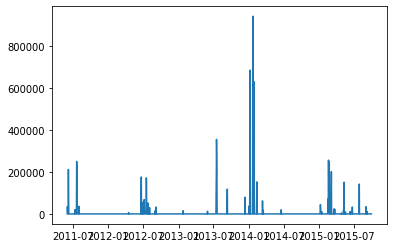

In [20]:
plt.plot(df['Newrev'])
sum(df['Newrev'])

#Therefore, if we robustly turn on or off by day [min hour=24, max hour=24x], we can at least secure \$10m revenue. 
#now, start thinking about hourly [min hour=16, max hou=inf] and improve upon "\$9.92mil"

# **Version 2**


 ## Create Headroom as a list we don't really care about which day exactly when to turn on and off,as long as the time period can be connected together , so we look at the data as 1583*24hour, what we need to do is just find out the profit period(lasting hour>=16)

In [21]:
heatrate=10.5
vomcost=5
gasadder=0.3
hrlist=[]
for i in df1.index:
    gasprice=df2.loc[i][0]
    for j in range(0,24):
        powerprice=df1.loc[i][j]
        headroom=powerprice-(gasprice+gasadder)*heatrate-vomcost
        hrlist.append(headroom)

In [22]:
len(hrlist)/24

1583.0

In [73]:
minhour=16

def openorclose(hrlist):
  currenthour=0
  currentstart=0
  currentend=0
  currentstatus=False #False represents OFF, True represents On
  headroomtotal=0
  i=0
  startup=0
  allist=[]
  proflist=[]
  while i<=len(hrlist):

    while currentstatus==False: 
      if hrlist[i]>=0:
        currentstart=i
        currenthour+=1
        currentstatus=True
        i+=1
      else:
        i+=1

    if i+16>len(hrlist):
      if currentend+16>=len(hrlist) and sum(hrlist[currenthour:])*200>0:
        headroomtotal+=(sum(hrlist[currenthour:])*200)
        proflist[-1]+=(sum(hrlist[currenthour:])*200)
        allist[-1]+=(sum(hrlist[currenthour:])*200)
        return (headroomtotal-startup*10000,allist,proflist)
      elif currentend+16<len(hrlist) and sum(hrlist[-16:])*200>10000:
        headroomtotal+=(sum(hrlist[-16:])*200)
        proflist.append(sum(hrlist[-16:])*200)
        allist.append(sum(hrlist[-16:])*200)
        startup+=1
        return (headroomtotal-startup*10000,allist,proflist)
      else:
        return (headroomtotal-startup*10000,allist,proflist)

    while currentstatus==True: 
      if currenthour<=16:
        currenthour+=1
        i+=1
      elif currenthour>16 and hrlist[i]>=0:
        currenthour+=1
        i+=1
      elif currenthour>16 and hrlist[i]<0:
        currentend=i-1
        currentstatus=False
    
    if (sum(hrlist[currentstart:currentend])*200)>10000:
      startup+=1
      headroomtotal+=(sum(hrlist[currentstart:currentend])*200)
      proflist.append((sum(hrlist[currentstart:currentend])*200))
    allist.append((sum(hrlist[currentstart:currentend])*200))
    currenthour=0
 
  return (headroomtotal-startup*10000,allist,proflist)

In [74]:
a,b,c=openorclose(hrlist)

In [75]:
a,a-sum(df['Newrev'])

(11940630.7618, 2021436.8779999968)

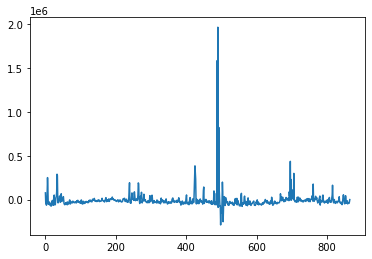

In [76]:
plt.plot(b)

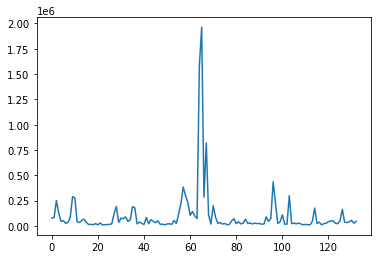

In [77]:
plt.plot(c)

#after a more detailed filter, we improve our profit by 2.02mil to 11.94mil.


In [78]:
sum(hrlist[-16:]),sum(hrlist[-17:-1]),sum(hrlist[-18:-2]),sum(hrlist[-19:-3])

(-16.163966, -2.3774539999999966, 6.824017000000005, 3.2723260000000067)

In [79]:
[hrlist[-16:],hrlist[-17:-1],hrlist[-16:-2]]

[[-0.6669460000000029,
  0.836744000000003,
  5.082408999999998,
  4.723671000000003,
  4.061388000000001,
  4.474651999999999,
  2.833109999999998,
  1.6928210000000021,
  0.45427500000000265,
  -4.186343999999998,
  -5.311314000000003,
  10.310828999999998,
  0.49948499999999996,
  -10.630108,
  -13.751448,
  -16.58719],
 [-2.800677999999998,
  -0.6669460000000029,
  0.836744000000003,
  5.082408999999998,
  4.723671000000003,
  4.061388000000001,
  4.474651999999999,
  2.833109999999998,
  1.6928210000000021,
  0.45427500000000265,
  -4.186343999999998,
  -5.311314000000003,
  10.310828999999998,
  0.49948499999999996,
  -10.630108,
  -13.751448],
 [-0.6669460000000029,
  0.836744000000003,
  5.082408999999998,
  4.723671000000003,
  4.061388000000001,
  4.474651999999999,
  2.833109999999998,
  1.6928210000000021,
  0.45427500000000265,
  -4.186343999999998,
  -5.311314000000003,
  10.310828999999998,
  0.49948499999999996,
  -10.630108]]

#As we can see in the screenshot above, we can still improve our profit by shift or extend the “ON” period to escape from a heavier loss and use a lighter loss to replace it. 

#*Version 3*

##find all possible periods with positive headroom, doesn't care about the profit.

In [80]:
def allpositive(hrlist):
  currenthour=0
  currentstart=0
  currentend=0
  currentstatus=False #False represents OFF, True represents On
  i=0
  allpos=[]
  while i<=len(hrlist):

    while currentstatus==False:
      if hrlist[i]>=0:
        currentstart=i
        currenthour+=1
        currentstatus=True
        i+=1
      else:
        i+=1

    if i+16>len(hrlist):
      if currenthour+16>=len(hrlist):
        allpos.append([currentstart,currentend])
        return (allpos)
      elif currenthour+16<len(hrlist):
        allpos.append([hrlist.index(hrlist[-17]),hrlist.index(hrlist[-1])])
        return (allpos)
      else:
        return (allpos)

    while currentstatus==True:
      if currenthour<=16:
        currenthour+=1
        i+=1
      elif currenthour>16 and hrlist[i]>=0:
        currenthour+=1
        i+=1
      elif currenthour>16 and hrlist[i]<0:
        currentend=i-1
        currentstatus=False
    allpos.append([currentstart,currentend])
    currenthour=0
  return (allpos)

In [81]:
allpos=allpositive(hrlist)

## escape heavier losses to gain greater profit

In [82]:
def ver3(allpos,hrlist):
  lastend=0 #上次关闭时间，主要不希望在调试的时候 头撞上上一次的尾
  startup=0
  headroomtotal=0 
  upgratedlist=[]
  proflist=[]
  allist=[]
  for i in range(len(allpos)):
    currentstart=allpos[i][0]
    currentend=allpos[i][1]
  
    while currentstart>lastend+2 and hrlist[currentstart-1]>hrlist[currentend]: #如果头没有撞上上一次的尾，而且有往前挪的可能，那就往前挪一小时
      currentstart-=1
      currentend-=1
    if currentstart==lastend+2 and hrlist[currentstart-1]>hrlist[currentend]:   #如果头即将撞上上一次的尾list[6],list[8]中间就差7
      currentstart-=1                                                            #而且还是赚的那么我们可以省去一次开启费，然后还可以把吊车尾给丢掉（因为已经满足16小时了）
      currentend-=1
      upgratedend=currentend
      while hrlist[upgratedend]<0:                                               
          upgratedend-=1 
      if (sum(hrlist[upgratedlist[-1][0]:upgratedlist[-1][1]])*200)>10000 and (sum(hrlist[currentstart:upgratedend])*200)>0:
        upgratedlist[-1]=[upgratedlist[-1][0],upgratedend]
      elif (sum(hrlist[upgratedlist[-1][0]:upgratedlist[-1][1]])*200)>0 and (sum(hrlist[currentstart:upgratedend])*200)>10000:
        upgratedlist[-1]=[upgratedlist[-1][0],upgratedend]
      else:
        upgratedlist.append([currentstart,currentend])
     
      lastend=currentend
      continue                                                   
    
    upgratedlist.append([currentstart,currentend])
    lastend=currentend
  
  for j in upgratedlist:
    if (sum(hrlist[j[0]:j[1]])*200)>10000: #We know that the last open lastted 16hr, so there is no extra modify needed for the allpos[-1]
        headroomtotal+=(sum(hrlist[j[0]:j[1]])*200)-10000  
        proflist.append((sum(hrlist[j[0]:j[1]])*200))
    allist.append((sum(hrlist[j[0]:j[1]])*200))
  return (headroomtotal,upgratedlist,proflist,allist)

In [83]:
final,upgratedlist,p,alli=ver3(allpos,hrlist)
final,final-a

(12325733.675999995, 385102.9141999949)

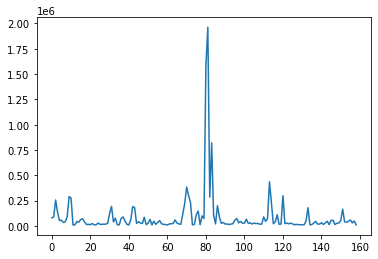

In [84]:
plt.plot(p)

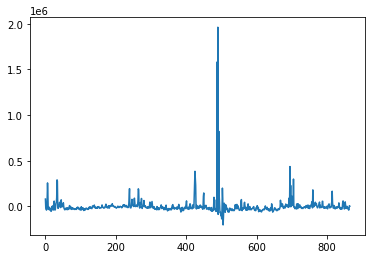

In [85]:
plt.plot(alli)

In [58]:
len(upgratedlist)

866

In [ ]:
def ver3(allpos,hrlist):
  lastend=0 #上次关闭时间，主要不希望在调试的时候 头撞上上一次的尾
  startup=0 #开启次数
  headroomtotal=0 #总价格
  upgratedlist=[] #更新后的时间间段,满足下好奇心
  for i in range(len(allpos)):
    currentstart=allpos[i][0]
    currentend=allpos[i][1]
  
    while currentstart>lastend+1 and hrlist[currentstart-1]>hrlist[currentend]: #如果头没有撞上上一次的尾，而且有往前挪的可能，那就往前挪一小时
      currentstart-=1
      currentend-=1
                                                      
    upgratedlist.append([currentstart,currentend])
    lastend=currentend
  
  for j in upgratedlist:
    if (sum(hrlist[j[0]:j[1]])*200)>10000: #We know that the last open lastted 16hr, so there is no extra modify needed for the allpos[-1]
        startup+=1
        headroomtotal+=(sum(hrlist[j[0]:j[1]])*200)
  return (headroomtotal-startup*10000,upgratedlist)

In [ ]:
final,upgratedlist=ver3(allpos,hrlist)
final,final-openorclose(hrlist)

(12324307.028999995, 383676.267199995)

#By doing this, we increase the profit by 385.74k to 12.33mil.